## Rede de ruas do OpenStreetMap com OSMnx e Python #3
### Morfologia urbana com figuras-fundo

#### Para o blog [paulovitorweb.wordpress.com](https://paulovitorweb.wordpress.com/)

Dando continuidade à nossa série de postagens sobre a biblioteca OSMnx, vamos conhecer uma função que gera figuras-fundo automaticamente, recriando os clássicos desenhos de Allan Jacobs muito conhecidos em estudos de morfologia urbana. As figuras são geradas na mesma escala, contemplando uma milha quadrada da rede, o que equivale a cerca de 2,6km².

Vamos importar a biblioteca e configurar o osmnx para usar cache, para evitar consultas desnecessárias à API, especialmente recomendável neste caso.

In [1]:
import osmnx as ox
ox.config(use_cache=True)

A função responsável por gerar as figuras é a `plot_figure_ground`. Você pode passar um par de coordenadas ou fornecer um endereço.

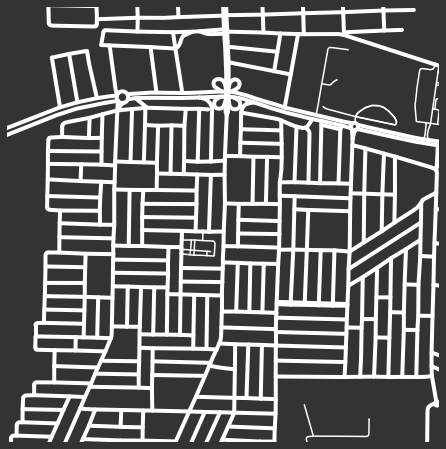

In [2]:
# passando coordenadas
archive_name = 'fg-mangabeira-jp' # nome do arquivo, importante que faça referência ao lugar
point = (-7.165975, -34.838512) # coordenadas lat, lon
fig, ax = ox.plot_figure_ground(point=point, filename=archive_name, show=True) # plotagem

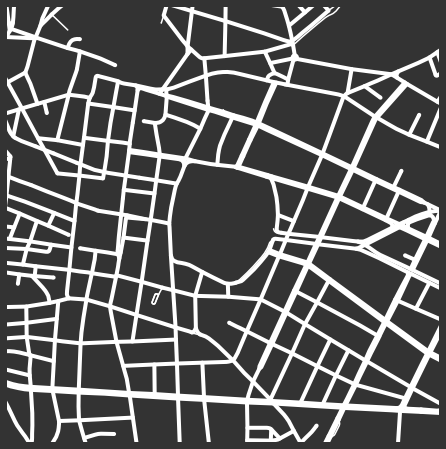

In [3]:
# passando um endereço
archive_name = 'fg-lagoa-jp' # nome do arquivo, importante que faça referência ao lugar
address = "Parque Solon de Lucena, João Pessoa, Brazil" # endereço para geocodificar
fig, ax = ox.plot_figure_ground(address=address, filename=archive_name, show=True) # plotagem

Você pode alterar o tipo de via. Por padrão, o valor é `drive_service`, que são as ruas públicas dirigíveis, incluindo estradas de serviço. Podemos considerar todas as ruas (exceto as privadas) da seguinte forma:

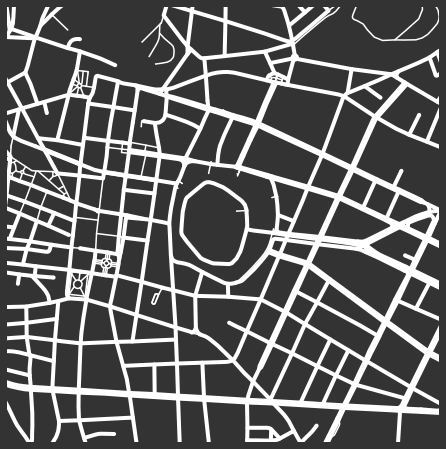

In [4]:
fig, ax = ox.plot_figure_ground(address=address, filename=archive_name, network_type='all', show=True)

Outra ajuste que dá pra fazer é a largura das vias. 

É possível definir isso pelo parâmetro `default_width`, que por padrão é 4 (pixels). Ele altera a largura das vias, exceto as que são definidas por outro parâmetro, o `street_widths`, que recebe um dicionário cujo padrão é `{'footway' : 1.5, 'steps' : 1.5, 'pedestrian' : 1.5, 'service' : 1.5, 'path' : 1.5, 'track' : 1.5, 'motorway' : 6}`.

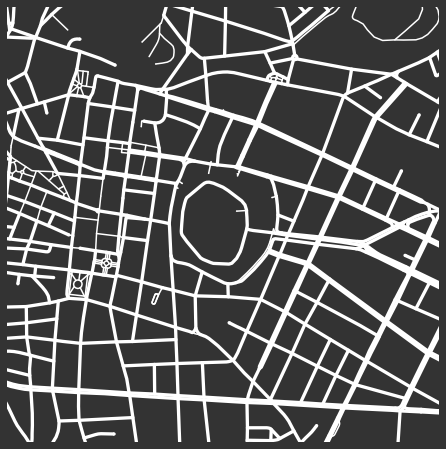

In [5]:
fig, ax = ox.plot_figure_ground(address=address, default_width=3.3,
                                filename=archive_name, network_type='all', show=True)

É possível alterar as cores, por meio dos parâmetros `edge_color` e `bgcolor`. Por exemplo, vamos inverter as cores:

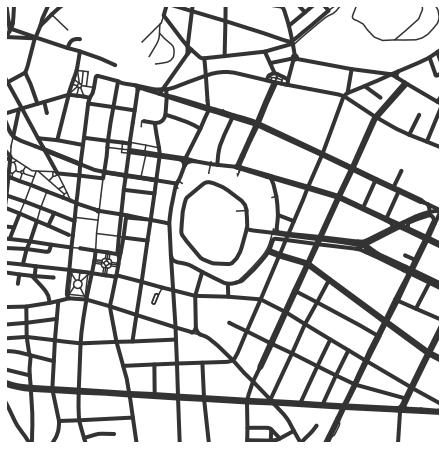

In [6]:
fig, ax = ox.plot_figure_ground(address=address, edge_color='#333333', bgcolor='w',
                                filename=archive_name, network_type='all', show=True)

Podemos também alterar o tamanho da figura:

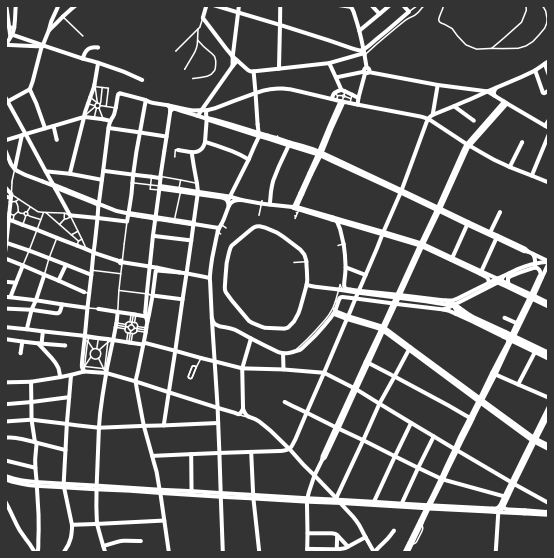

In [7]:
fig, ax = ox.plot_figure_ground(address=address, fig_length=10,
                                filename=archive_name, network_type='all', show=True)

Observe que, como a largura das vias é dada em pixels, com o aumento da figura o desenho das vias fica mais detalhado.

Na próxima postagem vamos abordar uma função muito útil na área de trânsito e transportes.